In [1]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re

In [2]:
RTSA = pd.read_csv("logs\RTSA_UnitTest.csv")
RTSA.head()


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1689385981139,876,Token Request,200,OK,Auth Token Request 1-1,text,True,NaN,3002,507,1,1,https://idcs-067d961402b24114844819b5e21e493d....,870,0,725
1,1689385982141,2972,10_Threads,200,OK,RTSA 1-5,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,2972,0,73
2,1689385982143,3052,10_Threads,200,OK,RTSA 1-7,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,3052,0,88
3,1689385982138,3190,10_Threads,200,OK,RTSA 1-2,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,3190,0,84
4,1689385982144,3186,10_Threads,200,OK,RTSA 1-9,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,3186,0,76


In [3]:
RTSA_test = Test(RTSA,60)
RTSA_test.results.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Segment,segment
0,1689385981139,876,Token Request,200,OK,Auth Token Request 1-1,text,True,NaN,3002,507,1,1,https://idcs-067d961402b24114844819b5e21e493d....,870,0,725,-1,NaN
1,1689385982141,2972,10_Threads,200,OK,RTSA 1-5,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,2972,0,73,-1,NaN
2,1689385982143,3052,10_Threads,200,OK,RTSA 1-7,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,3052,0,88,-1,NaN
3,1689385982138,3190,10_Threads,200,OK,RTSA 1-2,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,3190,0,84,-1,NaN
4,1689385982144,3186,10_Threads,200,OK,RTSA 1-9,text,True,NaN,915,3118,10,10,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,3186,0,76,-1,NaN


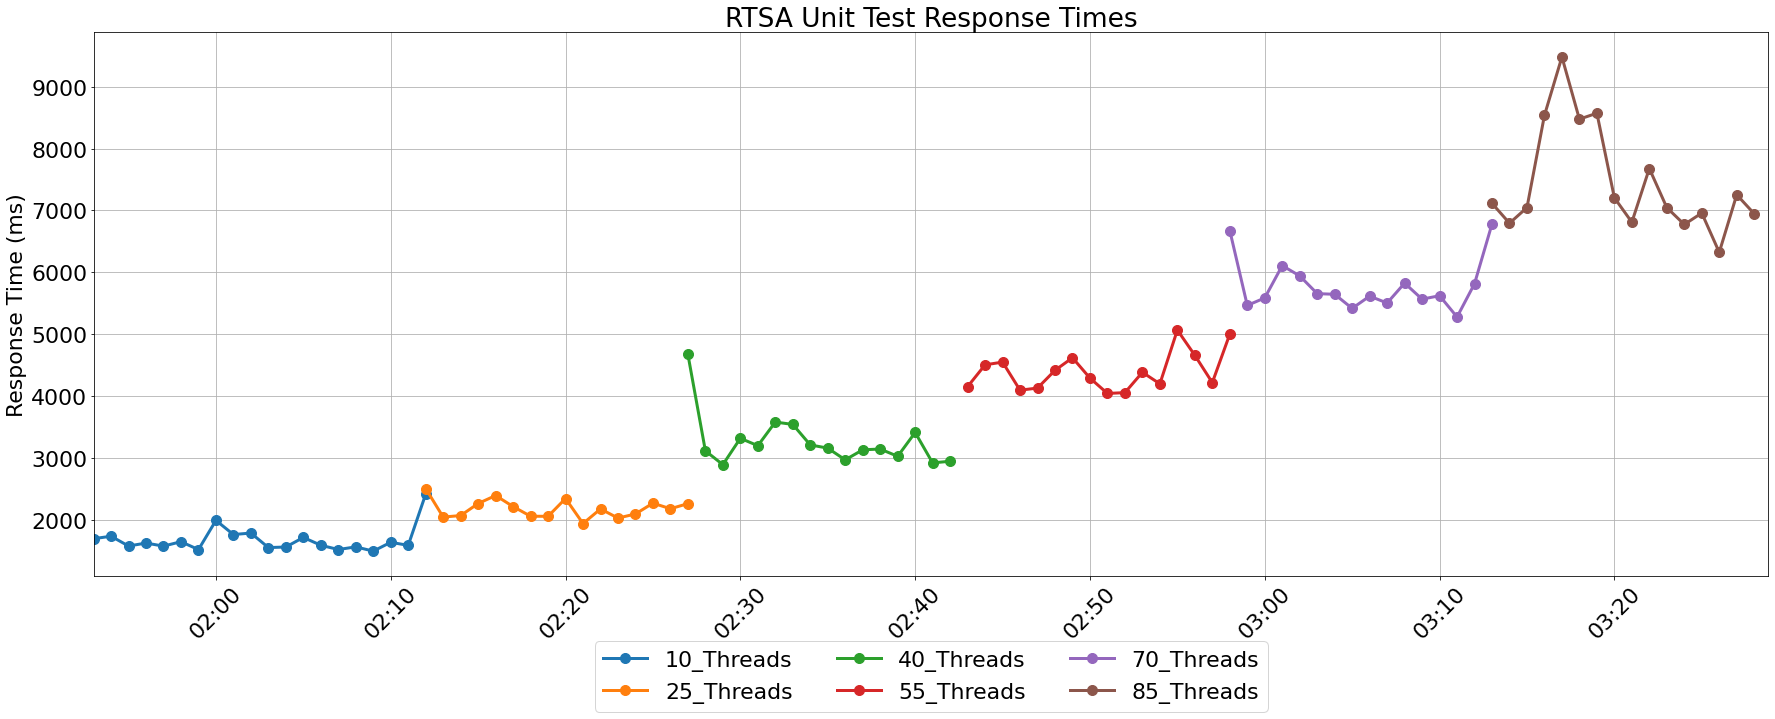

In [4]:
l = [label for label in RTSA_test.unique_labels if not label.startswith("Token")]
RTSA_test.time_series_by_labels(l, [], "RTSA Unit Test Response Times", 'avg_res')


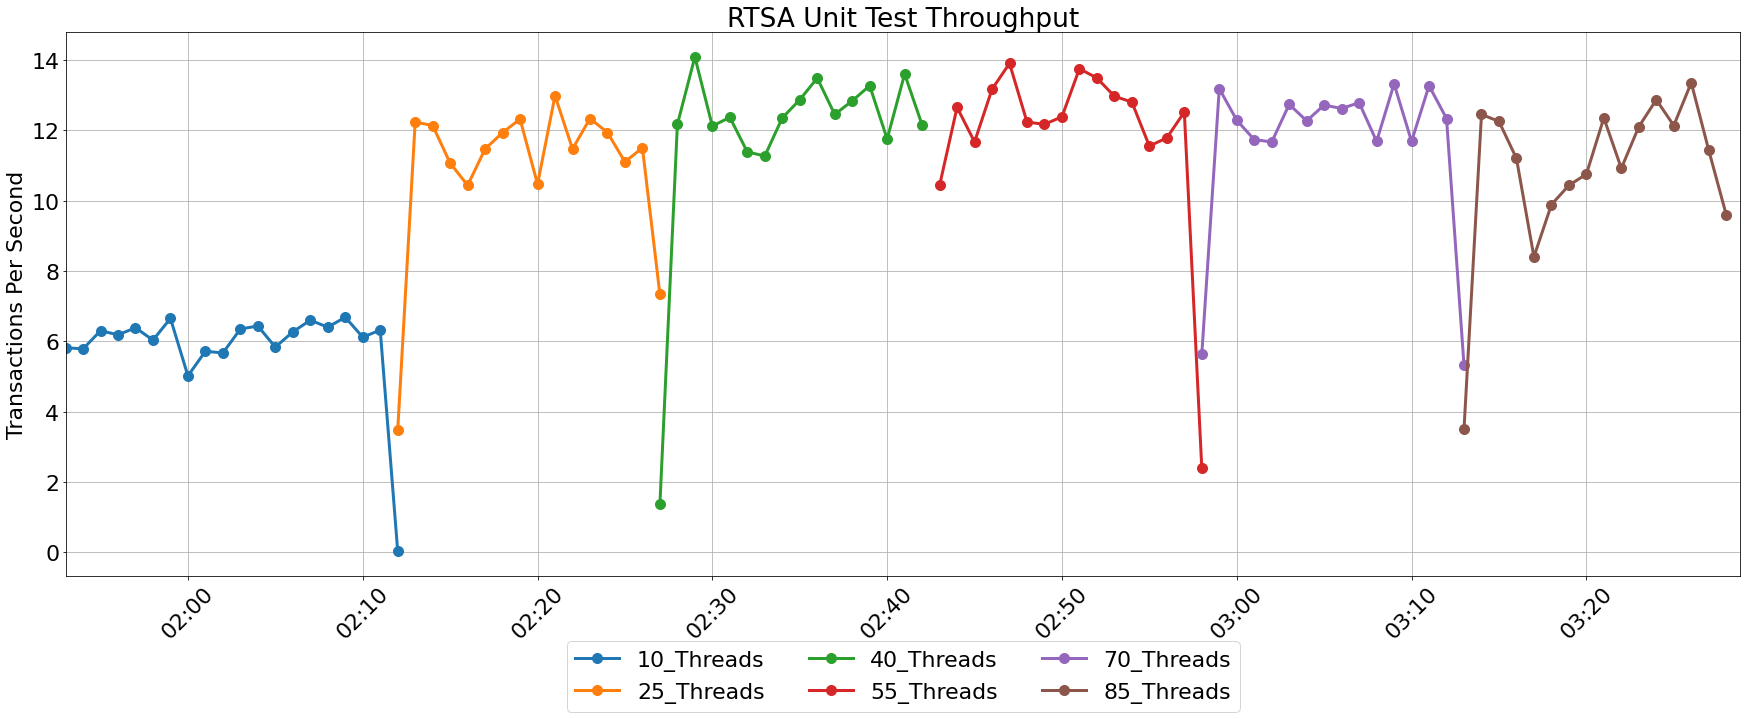

In [5]:
RTSA_test.time_series_by_labels(l, [], "RTSA Unit Test Throughput", 'txn_per_sec')

In [12]:
threads = [10,25,40,55,70,85]
RTSA_res = [1628.65, 2154.68, 3169.13, 4355.83, 5702.88, 7376.17]
RTSA_txns = [6.13, 11.59, 12.6, 12.61, 12.24, 11.48]


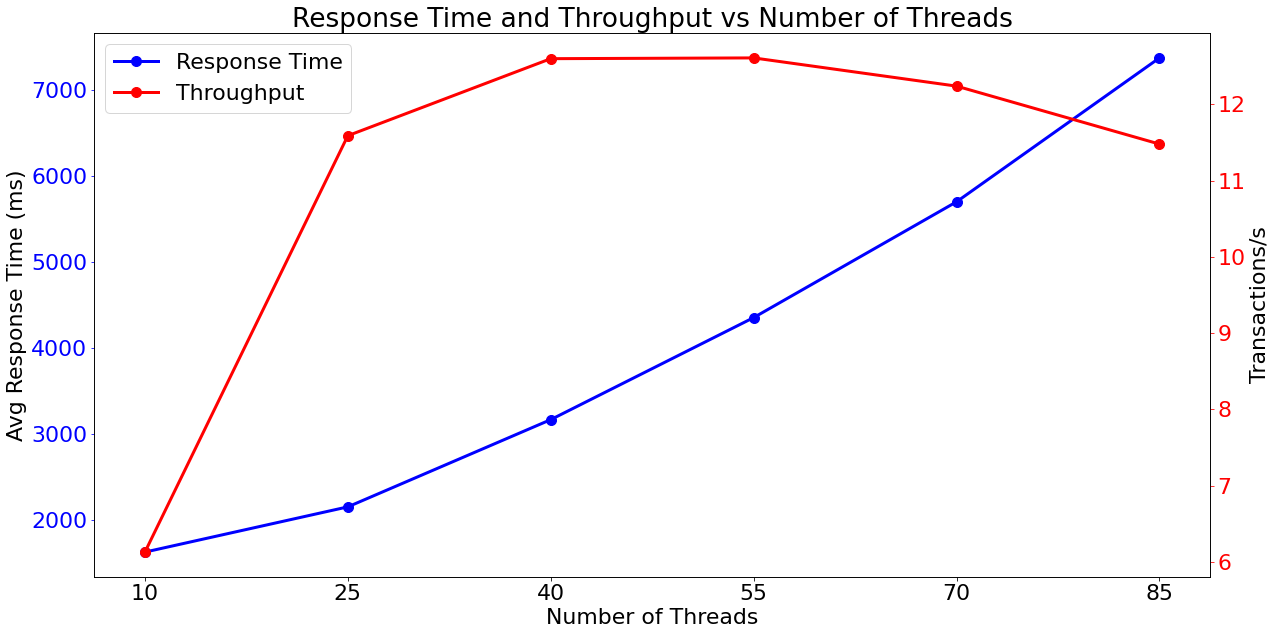

In [20]:
plt.rcParams["figure.figsize"] = [20, 10]
fig, ax1 = plt.subplots()

ax1.plot(threads, RTSA_res, 'b-', label='Response Time', linewidth=3,
                marker='o',
                markersize=10)
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Avg Response Time (ms)')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(threads, RTSA_txns, 'r-', label='Throughput', linewidth=3,
                marker='o',
                markersize=10)
ax2.set_ylabel('Transactions/s')
ax2.tick_params('y', colors='r')
ax1.set_xticks([10,25,40,55,70,85])

plt.title('Response Time and Throughput vs Number of Threads')
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.show()


In [23]:
RTSA_EDD = pd.read_csv("logs\RTSA_EDD_UnitTest.csv")
RTSA_EDD_test = Test(RTSA,60)

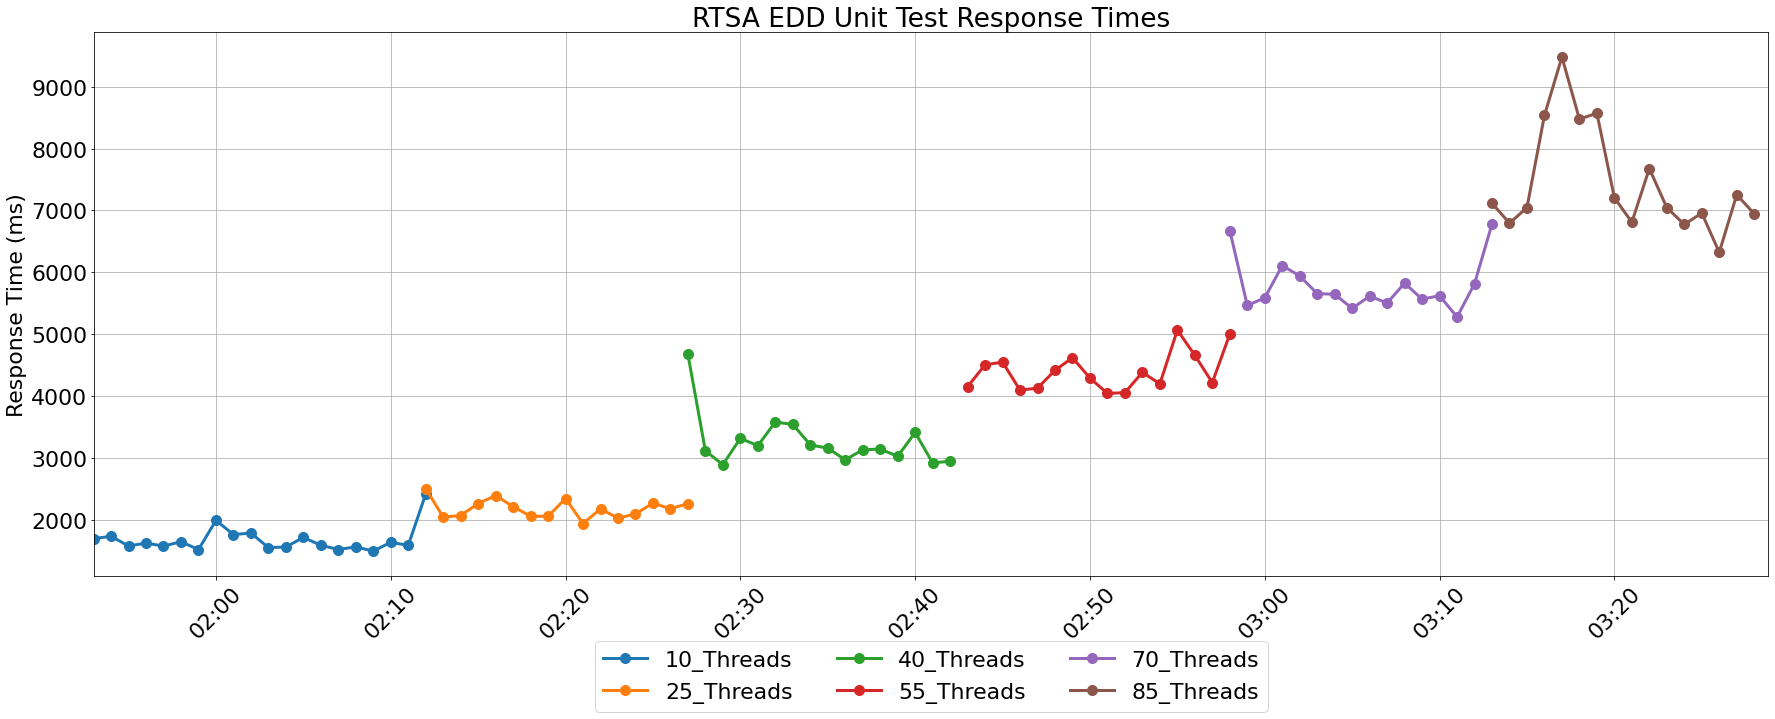

In [24]:
RTSA_EDD_test.time_series_by_labels([label for label in RTSA_EDD_test.unique_labels if not label.startswith("Token")], [], "RTSA EDD Unit Test Response Times", 'avg_res')

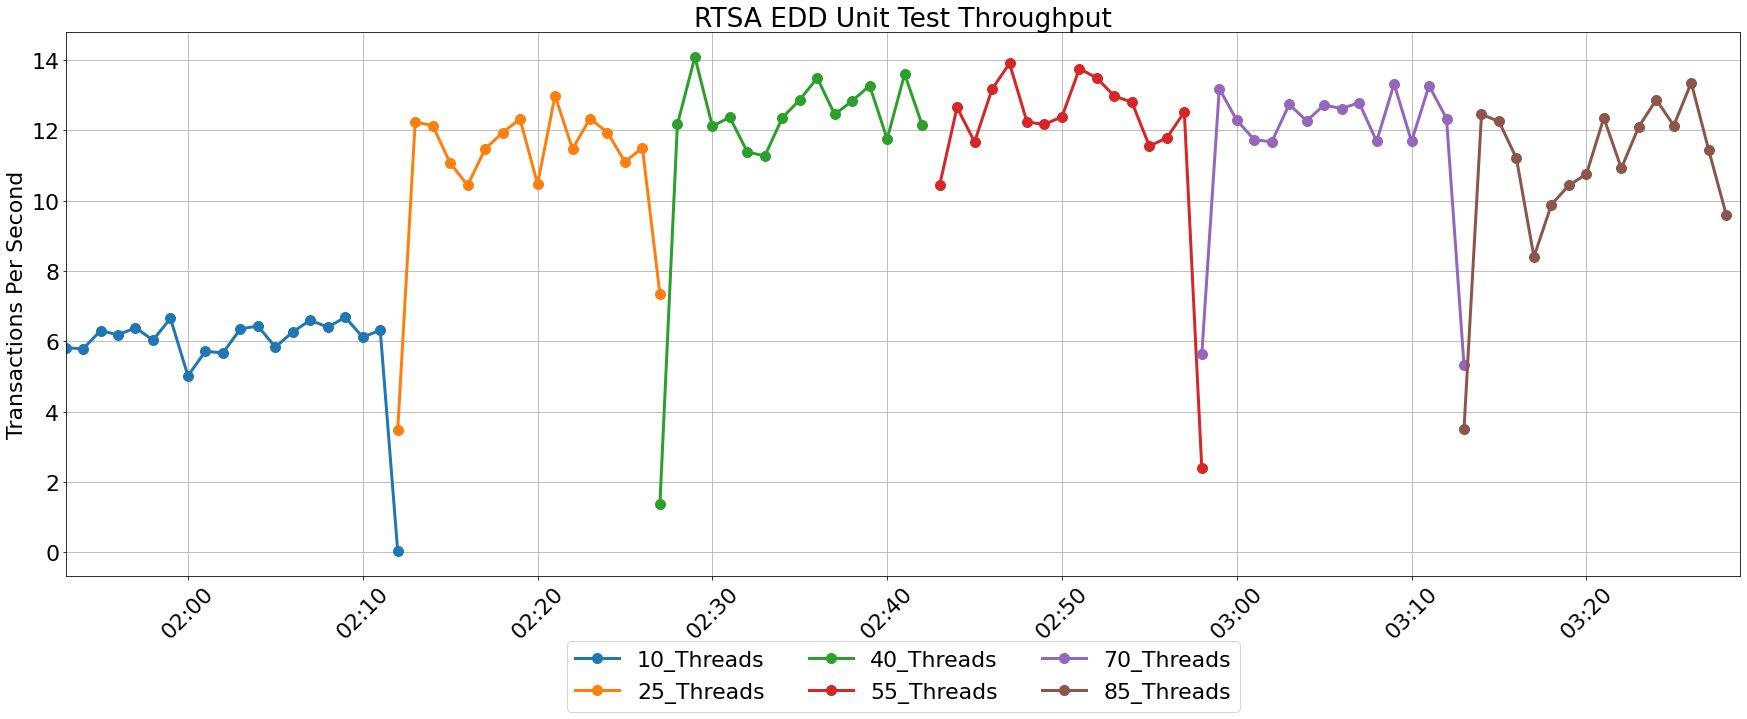

In [25]:
RTSA_EDD_test.time_series_by_labels([label for label in RTSA_EDD_test.unique_labels if not label.startswith("Token")], [], "RTSA EDD Unit Test Throughput", 'txn_per_sec')

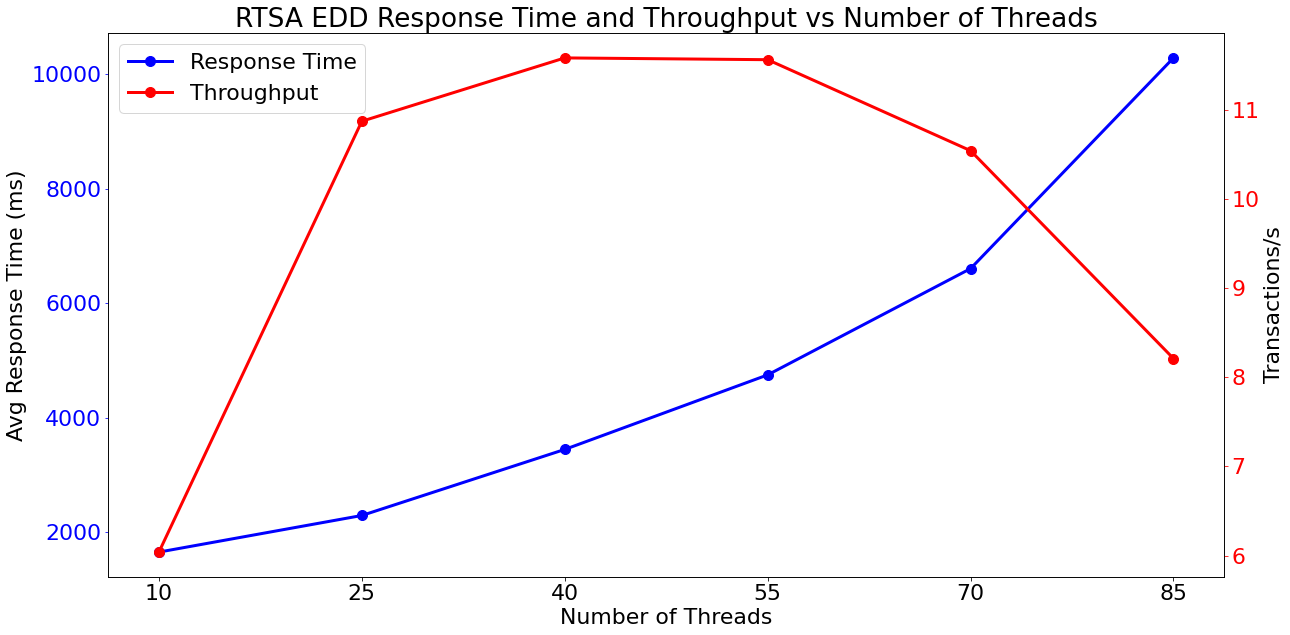

In [27]:
RTSA_EDD_res = [1655, 2294.16, 3447.41, 4749.04, 6604.79, 10283.67]
RTSA_EDD_txns = [6.04, 10.87, 11.58, 11.56, 10.54, 8.21]


plt.rcParams["figure.figsize"] = [20, 10]
fig, ax1 = plt.subplots()

ax1.plot(threads, RTSA_EDD_res, 'b-', label='Response Time', linewidth=3,
                marker='o',
                markersize=10)
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Avg Response Time (ms)')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(threads, RTSA_EDD_txns, 'r-', label='Throughput', linewidth=3,
                marker='o',
                markersize=10)
ax2.set_ylabel('Transactions/s')
ax2.tick_params('y', colors='r')
ax1.set_xticks([10,25,40,55,70,85])

plt.title('RTSA EDD Response Time and Throughput vs Number of Threads')
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.show()


In [16]:
TnT = pd.read_csv('logs/TnT_UnitTest.csv')
TnT["timeStamp"] = pd.to_datetime(TnT["timeStamp"], unit="ms")
TnT.set_index("timeStamp", inplace=True)
TnT.head()

,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
timeStamp,,,,,,,,,,,,,,,,
2023-07-15 04:22:43.300,942,Token Request,200,OK,Auth Token Request 1-1,text,True,NaN,261,425,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,935,0,810
2023-07-15 04:22:44.370,189,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,189,0,50
2023-07-15 04:22:44.561,107,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,107,0,0
2023-07-15 04:22:44.670,92,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,92,0,0
2023-07-15 04:22:44.764,87,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,87,0,0


In [7]:
TnT_test = Test(TnT,60)
TnT_labels = [label for label in TnT_test.unique_labels if not label.startswith("Token")]

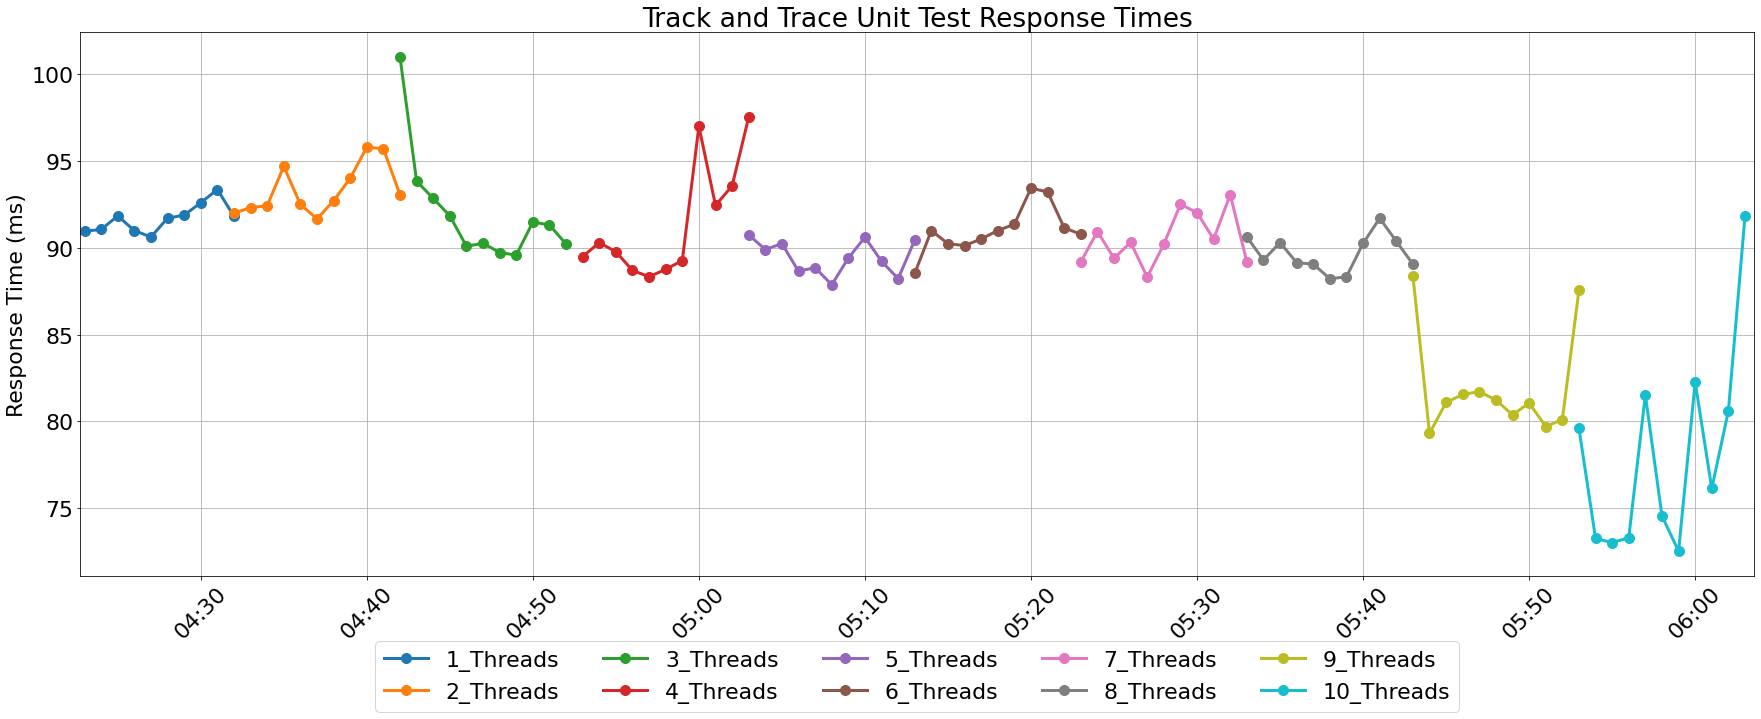

In [8]:
TnT_test.time_series_by_labels(TnT_labels, [], "Track and Trace Unit Test Response Times", 'avg_res')

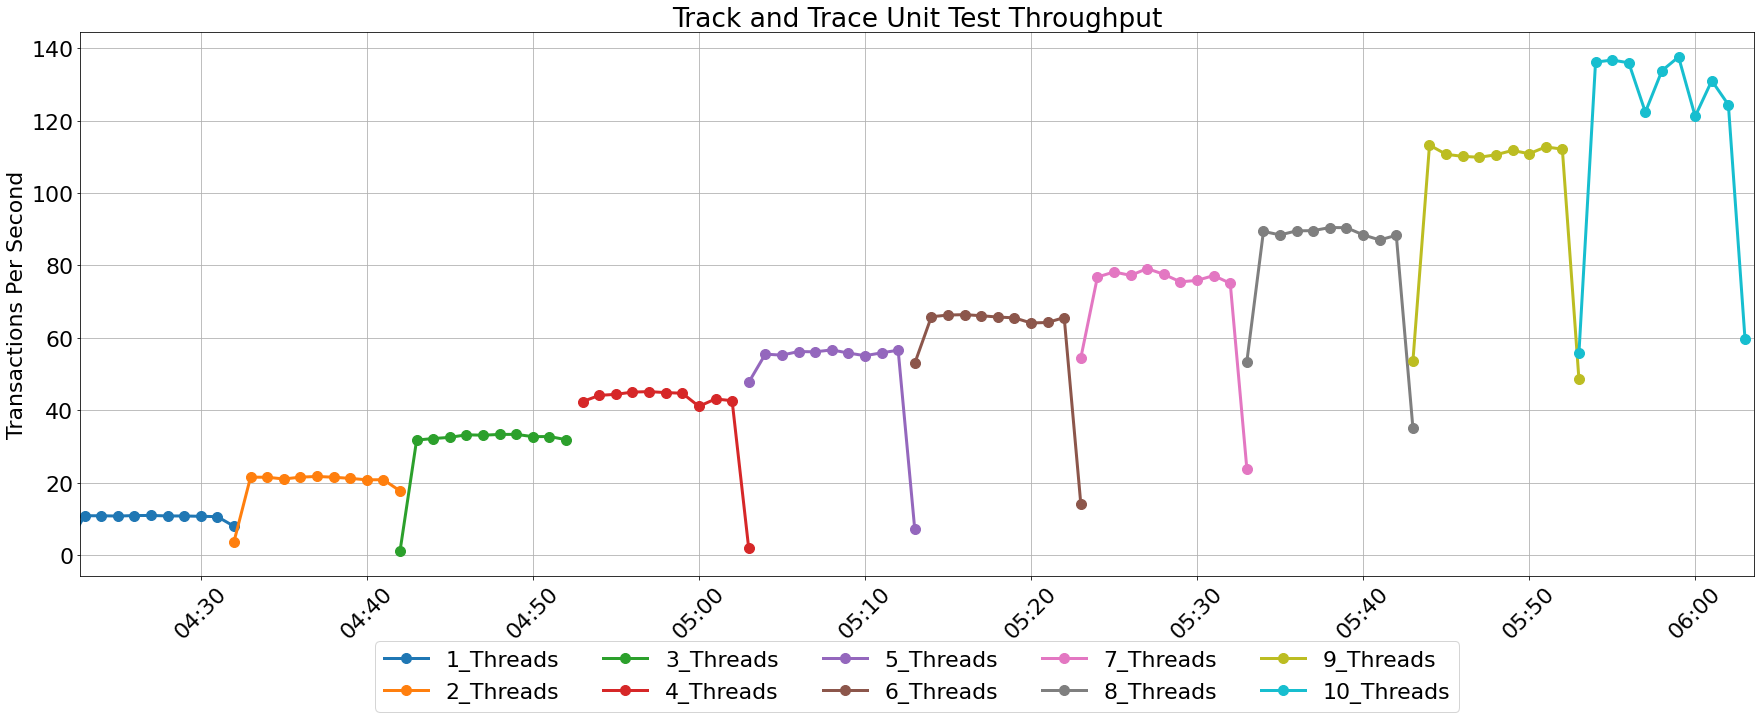

In [10]:
TnT_test.time_series_by_labels(TnT_labels, [], "Track and Trace Unit Test Throughput", 'txn_per_sec')

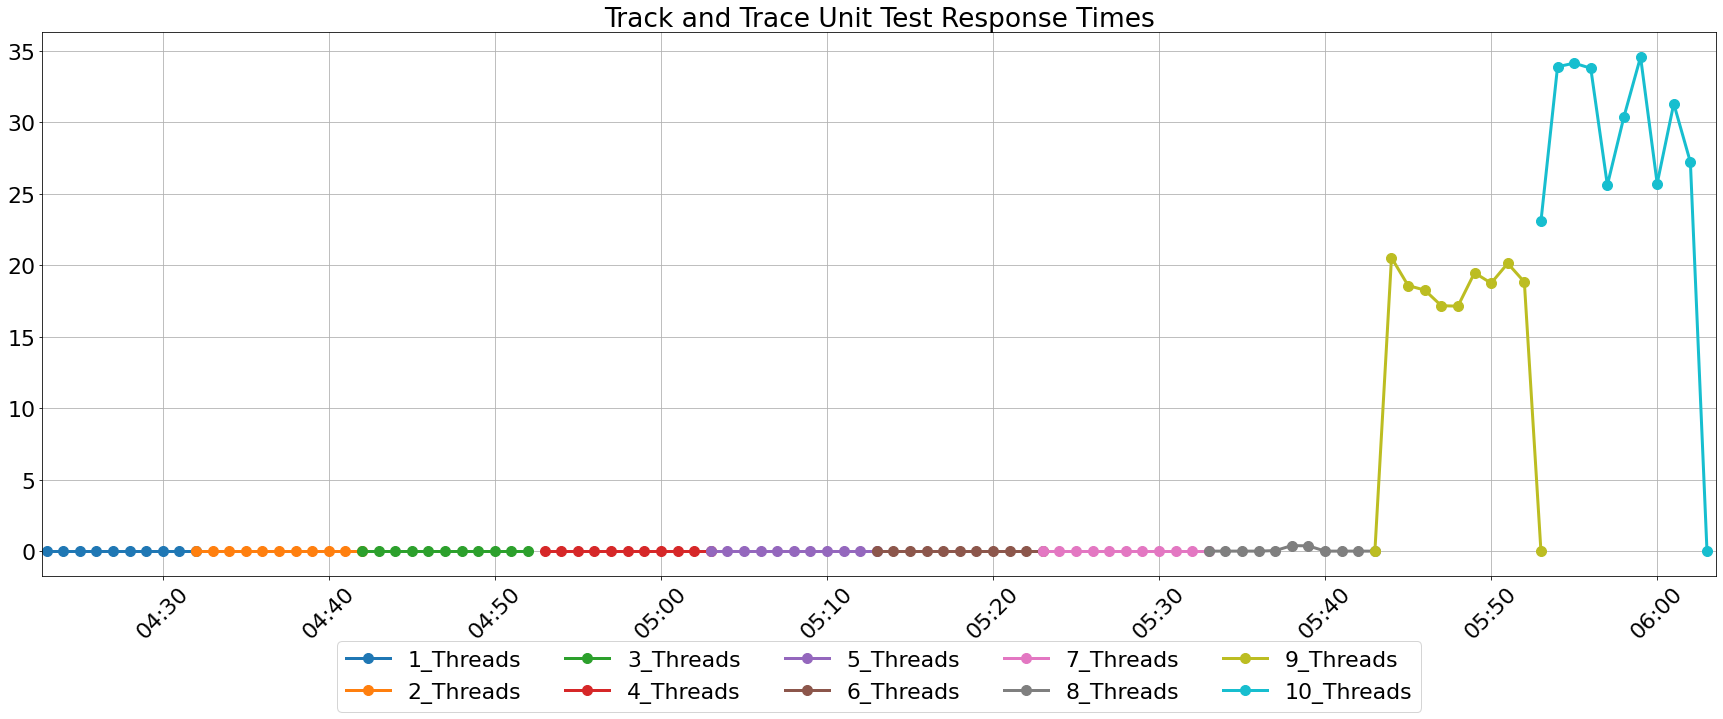

In [11]:
TnT_test.time_series_by_labels(TnT_labels, [], "Track and Trace Unit Test Response Times", 'error_pct')

In [22]:
error_pct = 100-TnT['success'].astype(int).resample(pd.Timedelta(seconds=60)).mean()*100
error_pct.values

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

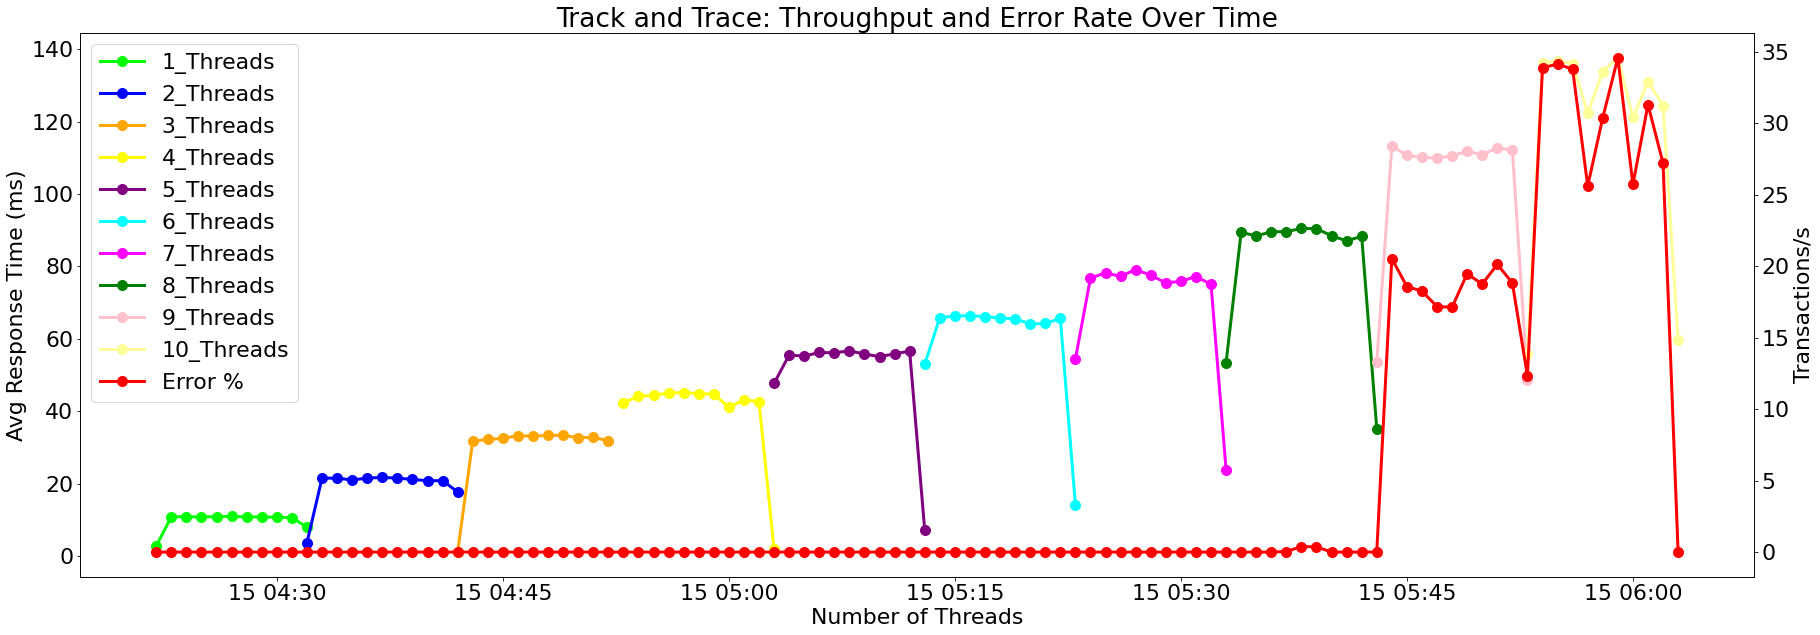

In [30]:
plt.rcParams["figure.figsize"] = [30, 10]
fig, ax1 = plt.subplots()


line_colors = ['#00FF00', '#0000FF', '#FFA500', '#FFFF00', '#800080', '#00FFFF', '#FF00FF', '#008000', '#FFC0CB', '#FFFF99']

i = 0

for ut in TnT_test.unit_tests:
    if not ut.label.startswith('Token'):
        df = ut.results.reset_index()
        ax1.plot(df['timeStamp'], df['txn_per_sec'], 'r-', label=ut.label, linewidth=3,
                        marker='o',
                        markersize=10, color=line_colors[i])
        i+=1
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Avg Response Time (ms)')
ax1.tick_params('y')

ax2 = ax1.twinx()

ax2.plot(error_pct.index, error_pct.values, 'b-', label='Error %', linewidth=2,ls='--' color='red')
    
ax2.set_ylabel('Transactions/s')
ax2.tick_params('y')


plt.title('Track and Trace: Throughput and Error Rate Over Time')
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.show()


In [49]:
one_thread = TnT_test.unit_tests[0]
one_thread.results.head(20)

,avg_res,txn_per_sec,Error%
timeStamp,,,
2023-07-15 04:22:30,935.0,0.033333,0.0
2023-07-15 04:23:00,NaN,0.000000,NaN
2023-07-15 04:23:30,NaN,0.000000,NaN
2023-07-15 04:24:00,NaN,0.000000,NaN
2023-07-15 04:24:30,NaN,0.000000,NaN
2023-07-15 04:25:00,NaN,0.000000,NaN
2023-07-15 04:25:30,NaN,0.000000,NaN
2023-07-15 04:26:00,NaN,0.000000,NaN
2023-07-15 04:26:30,NaN,0.000000,NaN


In [85]:
one_thread_2 = TnT[TnT['label']=='1_Threads']
one_thread_2["timeStamp"] = pd.to_datetime(one_thread_2["timeStamp"], unit="ms")
one_thread_2.head(20)

<ipython-input-85-e4b3c8e0e1e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_thread_2["timeStamp"] = pd.to_datetime(one_thread_2["timeStamp"], unit="ms")


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
1,2023-07-15 04:22:44.370,189,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,189,0,50
2,2023-07-15 04:22:44.561,107,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,107,0,0
3,2023-07-15 04:22:44.670,92,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,92,0,0
4,2023-07-15 04:22:44.764,87,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,87,0,0
5,2023-07-15 04:22:44.852,91,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,90,0,0
6,2023-07-15 04:22:44.945,86,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,86,0,0
7,2023-07-15 04:22:45.032,86,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,86,0,0
8,2023-07-15 04:22:45.120,86,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,86,0,0
9,2023-07-15 04:22:45.207,98,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,98,0,0
10,2023-07-15 04:22:45.306,85,1_Threads,200,OK,Thread Group 1-1,text,True,NaN,2309,396,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,85,0,0


In [97]:
one_thread_2 = TnT[TnT['label']=='1_Threads']
one_thread_2["timeStamp"] = pd.to_datetime(one_thread_2["timeStamp"], unit="ms").copy()
one_thread_2.set_index('timeStamp', inplace=True)
interval = pd.Timedelta(seconds=30)
resampled_df = one_thread_2.resample(interval).agg(
            {"Latency": np.mean, "threadName": "count"}
            )
error = one_thread_2['success'].astype(int).resample(interval).mean()*100
        #Rename the columns to 'average_elapsed' and 'value_count'
resampled_df.rename(
    columns={"Latency": "avg_res", "threadName": "txn_per_sec"},
    inplace=True,
)
resampled_df['success_pct'] = error
resampled_df["txn_per_sec"] = resampled_df["txn_per_sec"] / 30


<ipython-input-97-eba32d0f33ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_thread_2["timeStamp"] = pd.to_datetime(one_thread_2["timeStamp"], unit="ms").copy()


In [ ]:
re_df = one_thread_2.resample(interval).agg(
            {'success': np.mean}
            )

In [100]:
resampled_df.describe()

,avg_res,txn_per_sec,success_pct
count,21.000000,21.000000,21.0
mean,91.600198,10.347619,100.0
std,1.271384,1.630391,0.0
min,89.830816,5.233333,100.0
25%,90.719745,10.733333,100.0
50%,90.966463,10.866667,100.0
75%,92.444444,10.966667,100.0
max,94.281646,11.066667,100.0


In [77]:
TnT.dtypes

timeStamp            int64
elapsed              int64
label               object
responseCode         int64
responseMessage     object
threadName          object
dataType            object
success               bool
failureMessage     float64
bytes                int64
sentBytes            int64
grpThreads           int64
allThreads           int64
URL                 object
Latency              int64
IdleTime             int64
Connect              int64
dtype: object